# Paquetes

In [1]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import plotly.express as px
import numpy as np
import folium

# Importar archivo

In [89]:
incidentes_viales_cdmx = pd.read_csv('../Datasets/Accidentes/incidentes_viales.csv', encoding= 'Latin-1', low_memory=False)
incidentes_viales_cdmx.tail()

,folio,fecha_creacion,año_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,incidente_c4,delegacion_inicio,latitud,longitud,ano_cierre,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes_cierre,numero_incidente,V_F
632276,C5/201231/08132,31/12/2020,2020,23:48:48,Jueves,01/01/2021,00:06:12,accidente choque con lesionados,TLALPAN,19.302180,-99.147020,2021,URGENCIAS MEDICAS,LLAMADA DEL 911,TLALPAN,Enero,1,V
632277,AO/201231/07706,31/12/2020,2020,22:50:08,Jueves,01/01/2021,02:45:33,accidente choque con lesionados,MIGUEL HIDALGO,19.412716,-99.189823,2021,URGENCIAS MEDICAS,BOTON DE AUXILIO,MIGUEL HIDALGO,Enero,1,V
632278,C5/201231/08137,31/12/2020,2020,23:49:56,Jueves,01/01/2021,00:06:37,accidente choque con lesionados,TLALPAN,19.296480,-99.146270,2021,URGENCIAS MEDICAS,LLAMADA DEL 911,TLALPAN,Enero,1,V
632279,C5/201231/08161,31/12/2020,2020,23:53:33,Jueves,01/01/2021,01:45:26,accidente choque con lesionados,IZTAPALAPA,19.352450,-99.014730,2021,URGENCIAS MEDICAS,RADIO,IZTAPALAPA,Enero,1,V
632280,C5/201231/08188,31/12/2020,2020,23:54:59,Jueves,01/01/2021,00:41:00,accidente choque sin lesionados,ALVARO OBREGON,19.381050,-99.239490,2021,EMERGENCIA,LLAMADA DEL 911,ALVARO OBREGON,Enero,1,V


# Exploración inicial

In [90]:
incidentes_viales_cdmx.columns

Index(['folio', 'fecha_creacion', 'año_creacion', 'hora_creacion',
       'dia_semana', 'fecha_cierre', 'hora_cierre', 'incidente_c4',
       'delegacion_inicio', 'latitud', 'longitud', 'ano_cierre',
       'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre', 'mes_cierre',
       'numero_incidente', 'V_F'],
      dtype='object')

In [91]:
incidentes_viales_cdmx.shape

(632281, 18)

# Limpieza

In [92]:
column_name_mapping = {
    'incidente_c4' : 'tipo_de_incidente',
    'clas_con_f_alarma': 'clasificacion_incidente',
    'tipo_entrada': 'medio_de_aviso',
    'ano_cierre' : 'año_cierre'
}

incidentes_viales_cdmx = incidentes_viales_cdmx.rename(columns = column_name_mapping)

incidentes_viales_cdmx.head(3)

,folio,fecha_creacion,año_creacion,hora_creacion,dia_semana,fecha_cierre,hora_cierre,tipo_de_incidente,delegacion_inicio,latitud,longitud,año_cierre,clasificacion_incidente,medio_de_aviso,delegacion_cierre,mes_cierre,numero_incidente,V_F
0,C5/170101/05814,01/01/2017,2017,19:41:28,Domingo,01/01/2017,19:47:44,accidente choque con lesionados,IZTAPALAPA,19.36328,-99.10971,2017,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,Enero,1,V
1,C5/170101/01806,01/01/2017,2017,05:53:57,Domingo,01/01/2017,06:52:39,accidente volcadura,VENUSTIANO CARRANZA,19.45442,-99.11490,2017,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,Enero,1,V
2,AO/170101/02807,01/01/2017,2017,10:16:52,Domingo,01/01/2017,13:29:31,cadaver atropellado,CUAJIMALPA,19.34960,-99.30464,2017,EMERGENCIA,RADIO,CUAJIMALPA,Enero,1,V


# Exploración de datos

In [93]:
incidentes_viales_cdmx['tipo_de_incidente'].value_counts()

accidente choque sin lesionados                   326157
accidente choque con lesionados                   155537
lesionado atropellado                              81392
accidente motociclista                             42710
accidente volcadura                                14583
accidente persona atrapada / desbarrancada          2787
accidente ciclista                                  2355
accidente choque con prensados                      1741
accidente vehiculo atrapado                          785
accidente otros                                      750
cadaver atropellado                                  669
accidente vehi­culo atrapado varado                  656
cadaver accidente automovili­stico                   462
sismo choque sin lesionados                          388
accidente vehiculo desbarrancado                     380
detencion ciudadana atropellado                      372
sismo choque con lesionados                          288
mi ciudad calle incidente de tr

In [94]:
incidentes_viales_cdmx['delegacion_inicio'].value_counts()

IZTAPALAPA             104879
GUSTAVO A. MADERO       64784
CUAUHTEMOC              62457
MIGUEL HIDALGO          50130
COYOACAN                49431
BENITO JUAREZ           47684
ALVARO OBREGON          47053
VENUSTIANO CARRANZA     43055
TLALPAN                 42070
AZCAPOTZALCO            27295
IZTACALCO               25948
XOCHIMILCO              25566
TLAHUAC                 16206
CUAJIMALPA              12482
MAGDALENA CONTRERAS      9719
MILPA ALTA               3522
Name: delegacion_inicio, dtype: int64

In [95]:
incidentes_por_dia = pd.DataFrame(incidentes_viales_cdmx.groupby('dia_semana')['año_creacion'].value_counts())
incidentes_por_dia

año_creacion
dia_semana año_creacion              
Domingo    2018                 23466
           2019                 21692
           2017                 21354
           2020                 17043
Jueves     2018                 25806
           2019                 23450
           2017                 23212
           2020                 16612
Lunes      2018                 23394
           2017                 22770
           2019                 20850
           2020                 14746
Martes     2018                 23760
           2019                 23119
           2017                 21950
           2020                 15755
Miercoles  2018                 24673
           2019                 22943
           2017                 22913
           2020                 16374
Sabado     2018                 29246
           2017                 25979
           2019                 25774
           2020                 19834
Viernes    2018                 30577
           2019                 28415
           2017                 27238
           2020                 19336

In [96]:
incidentes_por_dia_freq = pd.DataFrame(100 * incidentes_viales_cdmx['dia_semana'].value_counts()/len(incidentes_viales_cdmx['dia_semana']))
incidentes_por_dia_freq

,dia_semana
Viernes,16.696058
Sabado,15.947498
Jueves,14.088673
Miercoles,13.744364
Martes,13.377596
Domingo,13.214852
Lunes,12.930959


In [97]:
incidentes_clasificacion = pd.DataFrame(incidentes_viales_cdmx.groupby('clasificacion_incidente')['año_creacion'].value_counts())
incidentes_clasificacion

año_creacion
clasificacion_incidente año_creacion              
DELITO                  2018                   143
                        2019                   122
                        2020                   114
                        2017                    80
EMERGENCIA              2018                100112
                        2017                 92418
                        2019                 91588
                        2020                 60502
FALSA ALARMA            2017                  2069
                        2018                  1543
                        2020                   720
                        2019                   324
URGENCIAS MEDICAS       2018                 79124
                        2019                 74209
                        2017                 70849
                        2020                 58364

In [98]:
incidentes_clasificacion.columns

Index(['año_creacion'], dtype='object')

In [99]:
incidentes_por_dia_freq = pd.DataFrame(100 * incidentes_viales_cdmx['clasificacion_incidente'].value_counts()/len(incidentes_viales_cdmx['clasificacion_incidente']))
incidentes_por_dia_freq

,clasificacion_incidente
EMERGENCIA,54.504247
URGENCIAS MEDICAS,44.686777
FALSA ALARMA,0.736381
DELITO,0.072594


In [100]:
incidentes_clasificacion = pd.DataFrame(incidentes_viales_cdmx.groupby('medio_de_aviso').size())
incidentes_clasificacion

,0
medio_de_aviso,
APLICATIVOS,146
BOTON DE AUXILIO,34097
CAMARA,984
LLAMADA APP911,7011
LLAMADA DEL 911,558665
RADIO,23884
REDES,2826
ZELLO,4668


In [101]:
incidentes_por_dia_freq = pd.DataFrame(100 * incidentes_viales_cdmx['medio_de_aviso'].value_counts()/len(incidentes_viales_cdmx['medio_de_aviso']))
incidentes_por_dia_freq

,medio_de_aviso
LLAMADA DEL 911,88.357075
BOTON DE AUXILIO,5.392697
RADIO,3.777434
LLAMADA APP911,1.108842
ZELLO,0.738279
REDES,0.446953
CAMARA,0.155627
APLICATIVOS,0.023091


In [102]:
clasificacion_año_delito = pd.DataFrame(incidentes_viales_cdmx.groupby('clasificacion_incidente')['año_creacion'].value_counts())
clasificacion_año_delito

año_creacion
clasificacion_incidente año_creacion              
DELITO                  2018                   143
                        2019                   122
                        2020                   114
                        2017                    80
EMERGENCIA              2018                100112
                        2017                 92418
                        2019                 91588
                        2020                 60502
FALSA ALARMA            2017                  2069
                        2018                  1543
                        2020                   720
                        2019                   324
URGENCIAS MEDICAS       2018                 79124
                        2019                 74209
                        2017                 70849
                        2020                 58364

In [106]:
clasificacion_class_incidente = pd.DataFrame(incidentes_viales_cdmx.groupby('clasificacion_incidente')['tipo_de_incidente'].value_counts())
clasificacion_class_incidente

tipo_de_incidente
clasificacion_incidente tipo_de_incidente                                                
DELITO                  detencion ciudadana atropellado                               369
                        detencion ciudadana accidente automovili­stico                 87
                        Detencion ciudadana accidente automovili­stico                  3
EMERGENCIA              accidente choque sin lesionados                            322804
                        accidente volcadura                                         14542
                        accidente persona atrapada / desbarrancada                   2770
                        accidente vehiculo atrapado                                   776
                        accidente otros                                               745
                        cadaver atropellado                                           666
                        accidente vehi­culo atrapado varado                           653
                        cadaver accidente automovili­stico                            460
                        sismo choque sin lesionados                                   388
                        accidente vehiculo desbarrancado                              377
                        sismo choque con lesionados                                   288
                        mi ciudad calle incidente de transito                          93
                        accidente ferroviario                                          39
                        sismo persona atropellada                                      17
                        mi ciudad taxi incidente de transito                            1
                        sismo choque con prensados                                      1
FALSA ALARMA            accidente choque sin lesionados                              3353
                        accidente choque con lesionados                               724
                        lesionado atropellado                                         315
                        accidente motociclista                                        163
                        accidente volcadura                                            41
                        accidente persona atrapada / desbarrancada                     17
                        accidente vehiculo atrapado                                     9
                        accidente choque con prensados                                  7
                        accidente ciclista                                              6
                        accidente otros                                                 5
                        accidente vehiculo desbarrancado                                3
                        accidente vehi­culo atrapado varado                             3
                        cadaver atropellado                                             3
                        detencion ciudadana atropellado                                 3
                        cadaver accidente automovili­stico                              2
                        accidente ferroviario                                           1
                        detencion ciudadana accidente automovili­stico                  1
URGENCIAS MEDICAS       accidente choque con lesionados                            154813
                        lesionado atropellado                                       81077
                        accidente motociclista                                      42547
                        accidente ciclista                                           2349
                        accidente choque con prensados                               1734
                        accidente monopati­n                                           26

In [16]:
clasificacion_dia_delito = pd.DataFrame(incidentes_viales_cdmx.groupby('clasificacion_incidente')['dia_semana'].value_counts())
clasificacion_dia_delito

dia_semana
clasificacion_incidente dia_semana            
DELITO                  Sabado              84
                        Viernes             84
                        Domingo             82
                        Martes              64
                        Jueves              54
                        Miercoles           48
                        Lunes               43
EMERGENCIA              Viernes          59635
                        Sabado           51788
                        Jueves           50276
                        Miercoles        49764
                        Martes           47920
                        Lunes            45436
                        Domingo          39801
FALSA ALARMA            Viernes            803
                        Sabado             708
                        Jueves             678
                        Miercoles          669
                        Martes             639
                        Lunes              592
                        Domingo            567
URGENCIAS MEDICAS       Sabado           48253
                        Viernes          45044
                        Domingo          43105
                        Jueves           38072
                        Miercoles        36422
                        Martes           35961
                        Lunes            35689

In [17]:
delito_por_dia = pd.DataFrame(clasificacion_dia_delito.loc['DELITO'])
delito_por_dia

,dia_semana
dia_semana,
Sabado,84
Viernes,84
Domingo,82
Martes,64
Jueves,54
Miercoles,48
Lunes,43


In [18]:
clasificacion_dia_delito.loc['URGENCIAS MEDICAS']

,dia_semana
dia_semana,
Sabado,48253
Viernes,45044
Domingo,43105
Jueves,38072
Miercoles,36422
Martes,35961
Lunes,35689


# Gráfica de dos variables

In [19]:
by_alcaldia = incidentes_viales_cdmx.groupby(level=0)[['año_creacion', 'delegacion_inicio', 'medio_de_aviso']].mean()
verdadero_falso = incidentes_viales_cdmx.groupby(level=0)['V_F'].last()
merged = by_alcaldia.merge(verdadero_falso, left_index=True, right_index=True)
falso = by_alcaldia[merged['V_F'] == 'F']
verdadero = by_alcaldia[merged['V_F'] == 'V']

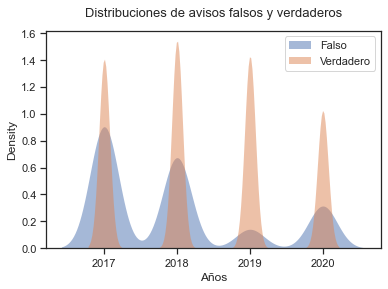

In [20]:
ax = sns.kdeplot(falso['año_creacion'], label='Falso',shade=True, fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
sns.kdeplot(verdadero['año_creacion'],shade=True, ax=ax, label='Verdadero', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
ax.set_title('Distribuciones de avisos falsos y verdaderos', fontsize=13, pad=15);
ax.set(xlabel='Años'); 
ax.legend(loc='upper right'); 

# Gráfica de barras

In [21]:
incidentes_viales_cdmx['delegacion_inicio'].unique()

array(['IZTAPALAPA', 'VENUSTIANO CARRANZA', 'CUAJIMALPA',
       'GUSTAVO A. MADERO', 'CUAUHTEMOC', 'XOCHIMILCO', 'TLALPAN',
       'IZTACALCO', 'TLAHUAC', 'COYOACAN', 'ALVARO OBREGON',
       'MIGUEL HIDALGO', 'MILPA ALTA', 'BENITO JUAREZ', 'AZCAPOTZALCO',
       'MAGDALENA CONTRERAS', nan], dtype=object)

In [22]:
incidentes_viales_cdmx['delegacion_inicio'].nunique()

16

In [23]:
counts_delegacion = incidentes_viales_cdmx['delegacion_inicio'].value_counts()
counts_delegacion

IZTAPALAPA             104879
GUSTAVO A. MADERO       64774
CUAUHTEMOC              62457
MIGUEL HIDALGO          50117
COYOACAN                49431
BENITO JUAREZ           47684
ALVARO OBREGON          47050
VENUSTIANO CARRANZA     43032
TLALPAN                 42069
AZCAPOTZALCO            27293
IZTACALCO               25946
XOCHIMILCO              25566
TLAHUAC                 16204
CUAJIMALPA              12482
MAGDALENA CONTRERAS      9719
MILPA ALTA               3522
Name: delegacion_inicio, dtype: int64

In [24]:
counts_delegacion.index

Index(['IZTAPALAPA', 'GUSTAVO A. MADERO', 'CUAUHTEMOC', 'MIGUEL HIDALGO',
       'COYOACAN', 'BENITO JUAREZ', 'ALVARO OBREGON', 'VENUSTIANO CARRANZA',
       'TLALPAN', 'AZCAPOTZALCO', 'IZTACALCO', 'XOCHIMILCO', 'TLAHUAC',
       'CUAJIMALPA', 'MAGDALENA CONTRERAS', 'MILPA ALTA'],
      dtype='object')

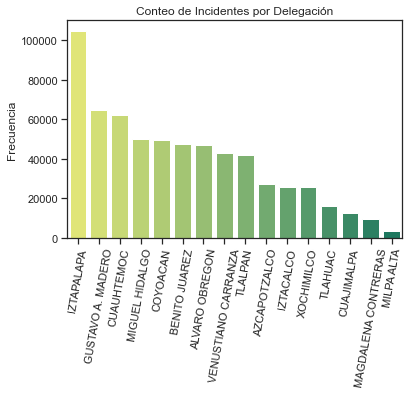

In [25]:
ax = sns.barplot(x=counts_delegacion.index, y=counts_delegacion, palette="summer_r")
ax.set_title('Conteo de Incidentes por Delegación')
ax.set(ylabel='Frecuencia')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

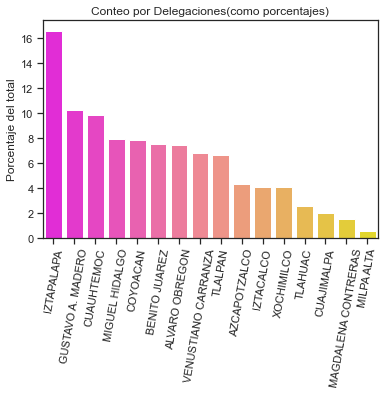

In [26]:
as_percentages = counts_delegacion * 100 / counts_delegacion.sum()
ax = sns.barplot(x=as_percentages.index,y=as_percentages, palette = "spring")
ax.set_title('Conteo por Delegaciones(como porcentajes)')
ax.set(ylabel='Porcentaje del total');
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

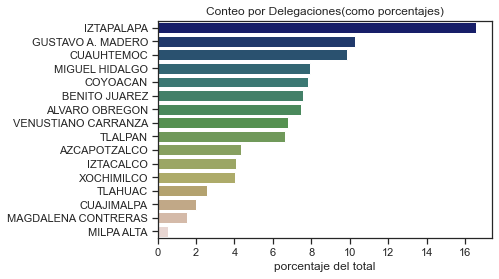

In [27]:
ax = sns.barplot(x=as_percentages, y=as_percentages.index, orient='h', palette = "gist_earth")
ax.set_title('Conteo por Delegaciones(como porcentajes)')
ax.set(xlabel='porcentaje del total');

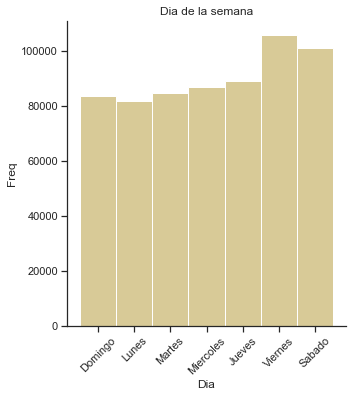

In [28]:
ax = sns.displot(incidentes_viales_cdmx['dia_semana'], kde = False, color = "y")
ax.set(title = 'Dia de la semana', xlabel = 'Dia', ylabel = 'Freq')
plt.xticks(rotation=45);

# Moda

In [29]:
moda_delegacion = incidentes_viales_cdmx['delegacion_inicio'].mode()
moda_dia_semana = incidentes_viales_cdmx['dia_semana'].mode()
moda_fecha_creacion = incidentes_viales_cdmx['fecha_creacion'].mode()

print(f'La delegación con más incidentes es {moda_delegacion}')
print(f'El día de la semana con más incidentes es el {moda_dia_semana}')
print(f'El día con más incidentes en los 3 años fue el {moda_fecha_creacion}')

La delegación con más incidentes es 0    IZTAPALAPA
dtype: object
El día de la semana con más incidentes es el 0    Viernes
dtype: object
El día con más incidentes en los 3 años fue el 0    14/02/2020
dtype: object


# Tablas de contingencia

In [30]:
delegacion_por_año_1 = pd.crosstab(incidentes_viales_cdmx['delegacion_inicio'], incidentes_viales_cdmx['año_creacion'], margins=True, margins_name='total')
delegacion_por_año_1

año_creacion,2017,2018,2019,2020,total
delegacion_inicio,,,,,
ALVARO OBREGON,12599,13934,12289,8228,47050
AZCAPOTZALCO,7217,7737,7057,5282,27293
BENITO JUAREZ,12415,13827,13100,8342,47684
COYOACAN,13124,14517,13270,8520,49431
CUAJIMALPA,3440,3629,3236,2177,12482
CUAUHTEMOC,16256,18108,16436,11657,62457
GUSTAVO A. MADERO,17671,18686,16406,12011,64774
IZTACALCO,6539,7178,7132,5097,25946
IZTAPALAPA,27366,29409,26981,21123,104879


In [31]:
incidente_por_año_1 = pd.crosstab(incidentes_viales_cdmx['tipo_de_incidente'], incidentes_viales_cdmx['año_creacion'], margins=True, margins_name='total')
incidente_por_año_1

año_creacion,2017,2018,2019,2020,total
tipo_de_incidente,,,,,
Detencion ciudadana accidente automovili­stico,0,0,3,0,3
accidente choque con lesionados,38212,44627,40658,32040,155537
accidente choque con prensados,616,492,349,284,1741
accidente choque sin lesionados,88640,95019,86262,56236,326157
accidente ciclista,0,0,704,1651,2355
accidente ferroviario,6,6,18,10,40
accidente monopati­n,0,0,17,9,26
accidente motociclista,9279,10709,11398,11324,42710
accidente otros,328,214,145,63,750


In [32]:
v_f_alerta = pd.crosstab(incidentes_viales_cdmx['año_creacion'], [incidentes_viales_cdmx['V_F'], incidentes_viales_cdmx['medio_de_aviso']], margins=True, margins_name='total')
v_f_alerta

V_F                           F                                              \
medio_de_aviso BOTON DE AUXILIO CAMARA LLAMADA APP911 LLAMADA DEL 911 RADIO   
año_creacion                                                                  
2017                         29      0             10            1963    41   
2018                         20      0             21            1436    25   
2019                          6      2              5             300    10   
2020                         26      0             13             644    30   
total                        81      2             49            4343   106   

V_F                                  V                                         \
medio_de_aviso REDES ZELLO APLICATIVOS BOTON DE AUXILIO CAMARA LLAMADA APP911   
año_creacion                                                                    
2017              22     4           0             9744    269           1218   
2018              16    25           0             9615    203           3453   
2019               1     0           0             7680    245           1694   
2020               7     0         146             6977    265            597   
total             46    29         146            34016    982           6962   

V_F                                                 total  
medio_de_aviso LLAMADA DEL 911  RADIO REDES ZELLO          
año_creacion                                               
2017                    144370   5641   761  1344  165416  
2018                    157359   4738   716  3295  180922  
2019                    149538   6078   684     0  166243  
2020                    103055   7321   619     0  119700  
total                   554322  23778  2780  4639  632281

In [33]:
v_f_alerta.loc[:, ('F')]

medio_de_aviso,BOTON DE AUXILIO,CAMARA,LLAMADA APP911,LLAMADA DEL 911,RADIO,REDES,ZELLO
año_creacion,,,,,,,
2017,29,0,10,1963,41,22,4
2018,20,0,21,1436,25,16,25
2019,6,2,5,300,10,1,0
2020,26,0,13,644,30,7,0
total,81,2,49,4343,106,46,29


In [34]:
delegacion_por_año_2 = pd.crosstab(incidentes_viales_cdmx['año_creacion'], incidentes_viales_cdmx['delegacion_inicio'], margins=True, margins_name='total')
delegacion_por_año_2

delegacion_inicio,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA,CUAUHTEMOC,GUSTAVO A. MADERO,IZTACALCO,IZTAPALAPA,MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO,total
año_creacion,,,,,,,,,,,,,,,,,
2017,12599,7217,12415,13124,3440,16256,17671,6539,27366,2370,14084,865,4185,10048,10761,6475,165415
2018,13934,7737,13827,14517,3629,18108,18686,7178,29409,2810,15172,980,4460,11197,12182,7068,180894
2019,12289,7057,13100,13270,3236,16436,16406,7132,26981,2523,13213,912,4139,11580,11352,6601,166227
2020,8228,5282,8342,8520,2177,11657,12011,5097,21123,2016,7648,765,3420,9244,8737,5422,119689
total,47050,27293,47684,49431,12482,62457,64774,25946,104879,9719,50117,3522,16204,42069,43032,25566,632225


In [35]:
incidentes_por_delegacion = pd.crosstab(incidentes_viales_cdmx['delegacion_inicio'], [incidentes_viales_cdmx['año_creacion'], incidentes_viales_cdmx['clasificacion_incidente']], margins=True, margins_name='total')
incidentes_por_delegacion

año_creacion              2017                                            \
clasificacion_incidente DELITO EMERGENCIA FALSA ALARMA URGENCIAS MEDICAS   
delegacion_inicio                                                          
ALVARO OBREGON               2       7514          134              4949   
AZCAPOTZALCO                 4       3780           63              3370   
BENITO JUAREZ                5       7204           38              5168   
COYOACAN                     0       7432          100              5592   
CUAJIMALPA                   0       2068           42              1330   
CUAUHTEMOC                   9       8293          132              7822   
GUSTAVO A. MADERO            8       9640          546              7477   
IZTACALCO                    3       3572           32              2932   
IZTAPALAPA                  20      15371          469             11506   
MAGDALENA CONTRERAS          3       1322           37              1008   
MIGUEL HIDALGO               5       9097          253              4729   
MILPA ALTA                   0        497           11               357   
TLAHUAC                      4       2019           65              2097   
TLALPAN                      6       5532           32              4478   
VENUSTIANO CARRANZA          6       5650           54              5051   
XOCHIMILCO                   5       3427           60              2983   
total                       80      92418         2068             70849   

año_creacion              2018                                            \
clasificacion_incidente DELITO EMERGENCIA FALSA ALARMA URGENCIAS MEDICAS   
delegacion_inicio                                                          
ALVARO OBREGON               5       8148          123              5658   
AZCAPOTZALCO                 4       4259           61              3413   
BENITO JUAREZ                8       7778           51              5990   
COYOACAN                    18       8274           84              6141   
CUAJIMALPA                   2       2089           16              1522   
CUAUHTEMOC                  18       8950           63              9077   
GUSTAVO A. MADERO           12       9776          243              8655   
IZTACALCO                    4       3694           23              3457   
IZTAPALAPA                  28      16862          357             12162   
MAGDALENA CONTRERAS          2       1636            7              1165   
MIGUEL HIDALGO               6       9357          169              5640   
MILPA ALTA                   1        475           37               467   
TLAHUAC                      6       2145           16              2293   
TLALPAN                     11       6252            7              4927   
VENUSTIANO CARRANZA         13       6767           36              5366   
XOCHIMILCO                   5       3643          237              3183   
total                      143     100105         1530             79116   

año_creacion              2019                                            \
clasificacion_incidente DELITO EMERGENCIA FALSA ALARMA URGENCIAS MEDICAS   
delegacion_inicio                                                          
ALVARO OBREGON               9       7227           13              5040   
AZCAPOTZALCO                 1       3885           21              3150   
BENITO JUAREZ                5       7482           20              5593   
COYOACAN                     9       7503           64              5694   
CUAJIMALPA                   3       1877            2              1354   
CUAUHTEMOC                  14       7952           17              8453   
GUSTAVO A. MADERO           10       8598           43              7755   
IZTACALCO                    6       3732           14              3380   
IZTAPALAPA                  27      15426           53             11475   
MAGDALENA CONTRERAS          3       1424     

In [36]:
incidentes_por_delegacion.loc[:, (2019)]

clasificacion_incidente,DELITO,EMERGENCIA,FALSA ALARMA,URGENCIAS MEDICAS
delegacion_inicio,,,,
ALVARO OBREGON,9,7227,13,5040
AZCAPOTZALCO,1,3885,21,3150
BENITO JUAREZ,5,7482,20,5593
COYOACAN,9,7503,64,5694
CUAJIMALPA,3,1877,2,1354
CUAUHTEMOC,14,7952,17,8453
GUSTAVO A. MADERO,10,8598,43,7755
IZTACALCO,6,3732,14,3380
IZTAPALAPA,27,15426,53,11475


In [37]:
incidentes_2020 = incidentes_por_delegacion.loc[:, (2020)]
incidentes_2020

clasificacion_incidente,DELITO,EMERGENCIA,FALSA ALARMA,URGENCIAS MEDICAS
delegacion_inicio,,,,
ALVARO OBREGON,11,4278,29,3910
AZCAPOTZALCO,3,2476,44,2759
BENITO JUAREZ,7,4199,40,4096
COYOACAN,9,4498,69,3944
CUAJIMALPA,1,1153,3,1020
CUAUHTEMOC,5,5055,71,6526
GUSTAVO A. MADERO,15,5832,119,6045
IZTACALCO,2,2480,27,2588
IZTAPALAPA,25,11503,117,9478


# Graficando con múltiples axis

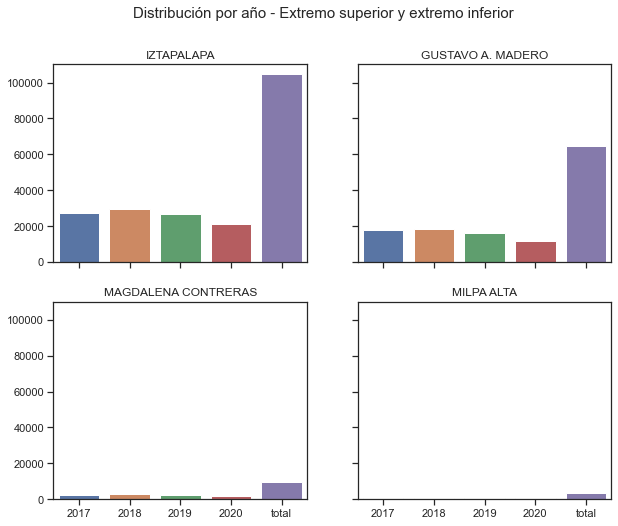

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(x=delegacion_por_año_1.columns, y=delegacion_por_año_1.loc['IZTAPALAPA'], ax=axes[0,0])
sns.barplot(x=delegacion_por_año_1.columns, y=delegacion_por_año_1.loc['GUSTAVO A. MADERO'], ax=axes[0,1])
sns.barplot(x=delegacion_por_año_1.columns, y=delegacion_por_año_1.loc['MAGDALENA CONTRERAS'], ax=axes[1,0])
sns.barplot(x=delegacion_por_año_1.columns, y=delegacion_por_año_1.loc['MILPA ALTA'], ax=axes[1,1])


axes[0, 0].set(xlabel='', ylabel='', title='IZTAPALAPA')
axes[0, 1].set(xlabel='', ylabel='', title='GUSTAVO A. MADERO')
axes[1, 0].set(xlabel='', ylabel='', title='MAGDALENA CONTRERAS')
axes[1, 1].set(xlabel='', ylabel='', title='MILPA ALTA')


fig.suptitle('Distribución por año - Extremo superior y extremo inferior', fontsize=15);

# Treemaps

In [109]:
incidentes_grouped_day = incidentes_viales_cdmx.groupby('folio')[['año_creacion','medio_de_aviso']].max()
incidentes_grouped_day.head()

,año_creacion,medio_de_aviso
folio,,
AO/170101/00965,2017,BOTON DE AUXILIO
AO/170101/01450,2017,BOTON DE AUXILIO
AO/170101/02807,2017,RADIO
AO/170102/02076,2017,BOTON DE AUXILIO
AO/170102/02428,2017,BOTON DE AUXILIO


In [110]:
incidentes_grouped_day['count'] = 1
incidentes_grouped_day.head()

,año_creacion,medio_de_aviso,count
folio,,,
AO/170101/00965,2017,BOTON DE AUXILIO,1
AO/170101/01450,2017,BOTON DE AUXILIO,1
AO/170101/02807,2017,RADIO,1
AO/170102/02076,2017,BOTON DE AUXILIO,1
AO/170102/02428,2017,BOTON DE AUXILIO,1


In [111]:
fig_treem = px.treemap(incidentes_grouped_day, path=['medio_de_aviso', 'año_creacion'], values='count')
fig_treem.show()

In [ ]:
incidentes_grouped_year = incidentes_viales_cdmx.groupby('folio')[['año_creacion', 'V_F']].max()
incidentes_grouped_year.tail()

In [ ]:
incidentes_grouped_year['count'] = 1
incidentes_grouped_year.head()

In [ ]:
fig_2 = px.treemap(incidentes_grouped_year, path=['año_creacion', 'V_F'], values='count')
fig_2.show()

In [ ]:
incidentes_grouped_d = incidentes_viales_cdmx.groupby('folio')[['año_creacion', 'dia_semana']].max()
incidentes_grouped_d.tail()

In [ ]:
incidentes_grouped_d['count'] = 1
incidentes_grouped_d.head()

In [ ]:
fig_4 = px.treemap(incidentes_grouped_d, path=['dia_semana', 'año_creacion'], values='count')
fig_4.show()

In [ ]:
fig_5 = px.treemap(incidentes_grouped_d, path=['año_creacion', 'dia_semana'], values='count', color = 'dia_semana')
fig_5.show()

In [49]:
incidentes_viales_cdmx.columns

Index(['folio', 'fecha_creacion', 'año_creacion', 'hora_creacion',
       'dia_semana', 'fecha_cierre', 'hora_cierre', 'tipo_de_incidente',
       'delegacion_inicio', 'latitud', 'longitud', 'año_cierre',
       'clasificacion_incidente', 'medio_de_aviso', 'delegacion_cierre',
       'mes_cierre', 'numero_incidente', 'V_F'],
      dtype='object')

# Gráfica de barras apiladas

IZTAPALAPA             104879
GUSTAVO A. MADERO       64774
CUAUHTEMOC              62457
MIGUEL HIDALGO          50117
COYOACAN                49431

In [50]:
incidentes_viales_cdmx_grouped_1 = incidentes_viales_cdmx.groupby('folio')[['año_creacion','delegacion_inicio']].max()

In [51]:
incidentes_viales_cdmx_mayores = incidentes_viales_cdmx_grouped_1[incidentes_viales_cdmx_grouped_1['delegacion_inicio'].isin(['IZTAPALAPA','GUSTAVO A. MADERO', 'CUAUHTEMOC', 'MIGUEL HIDALGO', 'COYOACAN'])]

In [52]:
value_counts_all = incidentes_viales_cdmx_mayores['delegacion_inicio'].value_counts()
value_counts_all

IZTAPALAPA           104879
GUSTAVO A. MADERO     64774
CUAUHTEMOC            62457
MIGUEL HIDALGO        50117
COYOACAN              49431
Name: delegacion_inicio, dtype: int64

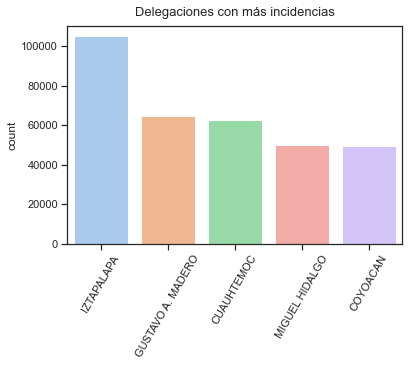

In [53]:
fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x= value_counts_all.index, y= value_counts_all, ax=ax, palette='pastel');

ax.set_ylabel('count')
ax.set_title('Delegaciones con más incidencias', fontsize=13, pad=10);
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);

In [54]:
incidentes_viales_cdmx_grouped_1['count'] = 1
incidentes_viales_cdmx_grouped_1.head()

,año_creacion,delegacion_inicio,count
folio,,,
AO/170101/00965,2017,MIGUEL HIDALGO,1
AO/170101/01450,2017,MAGDALENA CONTRERAS,1
AO/170101/02807,2017,CUAJIMALPA,1
AO/170102/02076,2017,ALVARO OBREGON,1
AO/170102/02428,2017,ALVARO OBREGON,1


In [55]:
incidentes_mayores_count = incidentes_viales_cdmx_grouped_1[incidentes_viales_cdmx_grouped_1['delegacion_inicio'].isin(['IZTAPALAPA','GUSTAVO A. MADERO', 'CUAUHTEMOC', 'MIGUEL HIDALGO', 'COYOACAN'])]

In [56]:
value_counts = incidentes_mayores_count.groupby(['delegacion_inicio','año_creacion'])['count'].sum()
value_counts

delegacion_inicio  año_creacion
COYOACAN           2017            13124
                   2018            14517
                   2019            13270
                   2020             8520
CUAUHTEMOC         2017            16256
                   2018            18108
                   2019            16436
                   2020            11657
GUSTAVO A. MADERO  2017            17671
                   2018            18686
                   2019            16406
                   2020            12011
IZTAPALAPA         2017            27366
                   2018            29409
                   2019            26981
                   2020            21123
MIGUEL HIDALGO     2017            14084
                   2018            15172
                   2019            13213
                   2020             7648
Name: count, dtype: int64

In [57]:
value_counts = value_counts.unstack(1)

value_counts

año_creacion,2017,2018,2019,2020
delegacion_inicio,,,,
COYOACAN,13124,14517,13270,8520
CUAUHTEMOC,16256,18108,16436,11657
GUSTAVO A. MADERO,17671,18686,16406,12011
IZTAPALAPA,27366,29409,26981,21123
MIGUEL HIDALGO,14084,15172,13213,7648


In [58]:
value_counts = value_counts.fillna(0)
value_counts

año_creacion,2017,2018,2019,2020
delegacion_inicio,,,,
COYOACAN,13124,14517,13270,8520
CUAUHTEMOC,16256,18108,16436,11657
GUSTAVO A. MADERO,17671,18686,16406,12011
IZTAPALAPA,27366,29409,26981,21123
MIGUEL HIDALGO,14084,15172,13213,7648


In [59]:
value_counts_1 = value_counts.drop(columns=[2017,2018])
value_counts_1

año_creacion,2019,2020
delegacion_inicio,,
COYOACAN,13270,8520
CUAUHTEMOC,16436,11657
GUSTAVO A. MADERO,16406,12011
IZTAPALAPA,26981,21123
MIGUEL HIDALGO,13213,7648


Text(0.5, 1.0, 'Incidencias durante 4 años en las alcaldías con más registros')

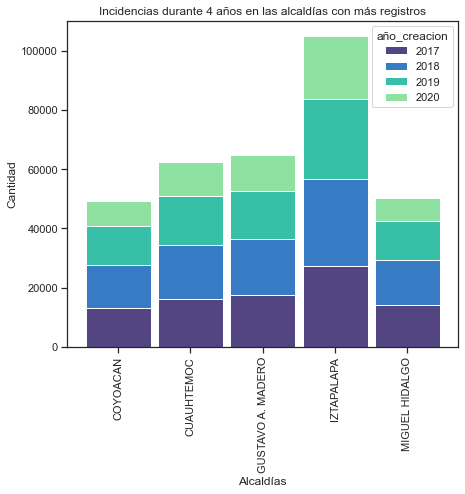

In [60]:
colores_barras_1 = ['#524582','#367BC3','#38BFA7', '#8FE1A2']

ax_3 = value_counts.plot(kind="bar", stacked = 'True', width = 0.9, color = colores_barras_1)

fig_3 = ax_3.get_figure()

fig_3.set_size_inches(7, 6)

ax_3.set_xlabel("Alcaldías")
ax_3.set_ylabel("Cantidad")
ax_3.set_title("Incidencias durante 4 años en las alcaldías con más registros")


[Text(0, 0, 'COYOACAN'),
 Text(1, 0, 'CUAUHTEMOC'),
 Text(2, 0, 'GUSTAVO A. MADERO'),
 Text(3, 0, 'IZTAPALAPA'),
 Text(4, 0, 'MIGUEL HIDALGO')]

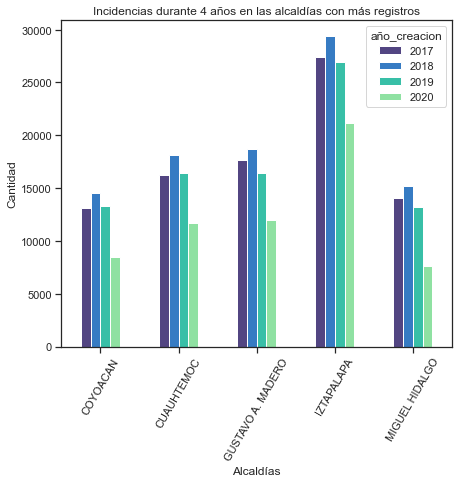

In [61]:
colores_barras = ['#524582','#367BC3','#38BFA7', '#8FE1A2']

ax_4 = value_counts.plot(kind="bar", color = colores_barras)

fig_4 = ax_4.get_figure()

fig_4.set_size_inches(7, 6)

ax_4.set_xlabel("Alcaldías")
ax_4.set_ylabel("Cantidad")
ax_4.set_title("Incidencias durante 4 años en las alcaldías con más registros")
ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=60)

In [62]:
value_counts

año_creacion,2017,2018,2019,2020
delegacion_inicio,,,,
COYOACAN,13124,14517,13270,8520
CUAUHTEMOC,16256,18108,16436,11657
GUSTAVO A. MADERO,17671,18686,16406,12011
IZTAPALAPA,27366,29409,26981,21123
MIGUEL HIDALGO,14084,15172,13213,7648


# K Medias

In [63]:
incidentes_viales_cdmx_2 = incidentes_viales_cdmx.drop(columns=['fecha_creacion', 'hora_creacion', 'dia_semana', 
                                                                'numero_incidente', 'fecha_cierre', 'año_cierre', 'mes_cierre',
                                                               'hora_cierre', 'delegacion_inicio','tipo_de_incidente', 
                                                               'clasificacion_incidente', 'medio_de_aviso', 'delegacion_cierre', 'año_creacion'])

incidentes_viales_cdmx_2

,folio,latitud,longitud,V_F
0,C5/170101/05814,19.363280,-99.109710,V
1,C5/170101/01806,19.454420,-99.114900,V
2,AO/170101/02807,19.349600,-99.304640,V
3,C5/170101/06904,19.453170,-99.096580,V
4,C5/170101/02347,19.422230,-99.094810,V
...,...,...,...,...
632276,C5/201231/08132,19.302180,-99.147020,V
632277,AO/201231/07706,19.412716,-99.189823,V
632278,C5/201231/08137,19.296480,-99.146270,V
632279,C5/201231/08161,19.352450,-99.014730,V


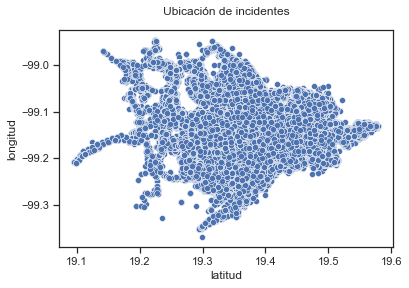

In [64]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de incidentes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=incidentes_viales_cdmx_2['latitud'], y=incidentes_viales_cdmx_2['longitud'], ax=ax);

In [65]:
from sklearn.cluster import KMeans

In [66]:
k_means = KMeans(n_clusters=16, max_iter=10000)

In [67]:
k_means.fit(incidentes_viales_cdmx_2[['latitud', 'longitud']])

KMeans(max_iter=10000, n_clusters=16)

In [68]:
centers = k_means.cluster_centers_

centers

array([[ 19.41803226, -99.18647148],
       [ 19.35293054, -99.12625591],
       [ 19.46638665, -99.09208056],
       [ 19.35823688, -99.2672057 ],
       [ 19.29516534, -99.14731513],
       [ 19.35719005, -99.02262689],
       [ 19.29897128, -99.22018143],
       [ 19.25573769, -99.01676282],
       [ 19.39707473, -99.0774277 ],
       [ 19.51056551, -99.13999141],
       [ 19.45382281, -99.1400609 ],
       [ 19.23463733, -99.11926519],
       [ 19.31968533, -99.06907681],
       [ 19.40611225, -99.1378549 ],
       [ 19.36346642, -99.18806512],
       [ 19.47054113, -99.19246563]])

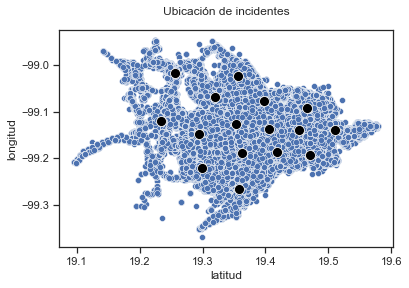

In [69]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de incidentes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x= incidentes_viales_cdmx_2['latitud'], y=incidentes_viales_cdmx_2['longitud'], ax=ax, palette='rainbow');
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');

In [70]:
clasificaciones = k_means.predict(incidentes_viales_cdmx_2[['latitud', 'longitud']])

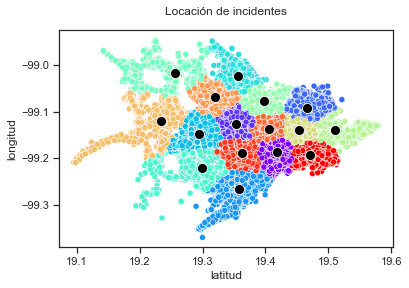

In [71]:
fig = plt.figure()

ax = fig.add_subplot()

ax.set_title('Locación de incidentes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x = incidentes_viales_cdmx_2['latitud'], y = incidentes_viales_cdmx_2['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');

sns.scatterplot(x = centers[:,0], y = centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

# Mapa cloropletico

In [72]:
m1=folium.Map(location=[19.3947291,-99.2576493])

In [73]:
from branca.element import Figure

In [74]:
fig=Figure(width=550,height=350)

In [75]:
m1=folium.Map(width=550,height=350,location=[19.3947291,-99.2576493],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)

In [76]:
fig2=Figure(width=550,height=350)
m2=folium.Map(location=[19.3947291,-99.2576493])
fig2.add_child(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)

In [77]:
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[19.3947291,-99.2576493],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)

folium.TileLayer('Stamen Terrain').add_to(m3)
folium.TileLayer('Stamen Toner').add_to(m3)
folium.TileLayer('Stamen Water Color').add_to(m3)
folium.TileLayer('cartodbpositron').add_to(m3)
folium.TileLayer('cartodbdark_matter').add_to(m3)
folium.LayerControl().add_to(m3)

folium.Marker(location=[19.39767826, -99.08014557],popup='Default popup Marker1',tooltip='1').add_to(m3)
folium.Marker(location=[19.3993043 , -99.14880174],popup='Default popup Marker1',tooltip='2').add_to(m3)
folium.Marker(location=[19.32062397, -99.06963735],popup='Default popup Marker1',tooltip='3').add_to(m3)
folium.Marker(location=[19.35778341, -99.26793961],popup='Default popup Marker1',tooltip='4').add_to(m3)
folium.Marker(location=[19.47539296, -99.18620402],popup='Default popup Marker1',tooltip='5').add_to(m3)
folium.Marker(location=[19.23463956, -99.1192417],popup='Default popup Marker1',tooltip='6').add_to(m3)
folium.Marker(location=[19.29507139, -99.14731198],popup='Default popup Marker1',tooltip='7').add_to(m3)
folium.Marker(location=[19.35737835, -99.0229658],popup='Default popup Marker1',tooltip='8').add_to(m3)
folium.Marker(location=[19.35177951, -99.1271155],popup='Default popup Marker1',tooltip='9').add_to(m3)
folium.Marker(location=[19.5073086 , -99.13905336],popup='Default popup Marker1',tooltip='10').add_to(m3)
folium.Marker(location=[19.29864764, -99.22019954],popup='Default popup Marker1',tooltip='11').add_to(m3)
folium.Marker(location=[19.25627843, -99.01695413],popup='Default popup Marker1',tooltip='12').add_to(m3)
folium.Marker(location=[19.42323285, -99.19199913],popup='Default popup Marker1',tooltip='13').add_to(m3)
folium.Marker(location=[19.44447976, -99.13654813],popup='Default popup Marker1',tooltip='14').add_to(m3)
folium.Marker(location=[19.46775912, -99.09194503],popup='Default popup Marker1',tooltip='15').add_to(m3)
folium.Marker(location=[19.36308756, -99.19021177],popup='Default popup Marker1',tooltip='16').add_to(m3)

m3